In [ ]:
pip install tweepy pandas matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.


In [25]:
import tweepy
from pyspark.sql import SparkSession
import pandas as pd

# Twitter API setup
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAC%2Be0wEAAAAAo11eAcB15%2FWgMc%2FuFKXv%2BXGtzgI%3D5qTHAEn0F3kdIdGD8gz04zzJu7eT2CgiTiwijKD182nYjYk3w3"

client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Initialize Spark
spark = SparkSession.builder.appName("tesla_tweepy_app").getOrCreate()

# Fetch tweets
tweets = client.search_recent_tweets(query="#tesla lang:en", max_results=20, tweet_fields=["text"])

# Prepare list with tweet_id and tweet_text
tweet_list = []
for tweet in tweets.data:
    tweet_list.append((tweet.id, tweet.text))

# Define schema
schema = ["tweet_id", "tweet_text"]

# Create Spark DataFrame
df = spark.createDataFrame(tweet_list, schema)

# Show DataFrame
df.show(truncate=False)


25/04/27 23:08:09 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|tweet_id           |tweet_text                                                                                                                                                                                                                                                                                                        |
+-------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|191669080451

In [26]:
# Convert Spark DataFrame to Pandas DataFrame
pdf = df.toPandas()

# Save the Pandas DataFrame to CSV
pdf.to_csv("tesla_tweets.csv", index=False)


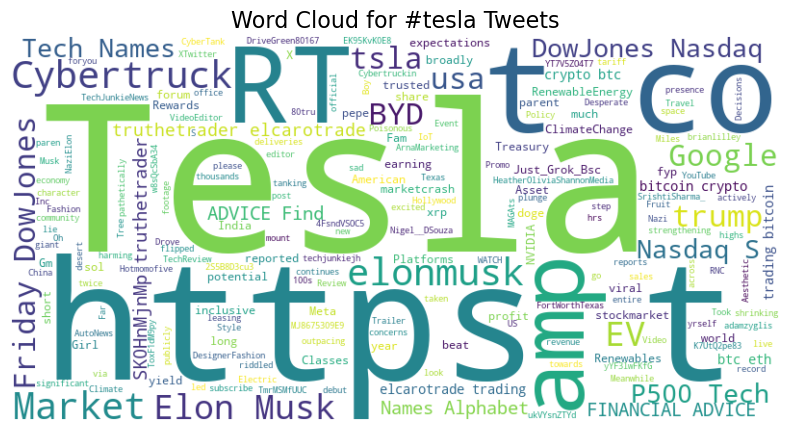

25/04/28 00:05:03 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 1024448 ms exceeds timeout 120000 ms
25/04/28 00:05:03 WARN SparkContext: Killing executors is not supported by current scheduler.
25/04/28 00:05:17 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$

In [ ]:
# Import libraries for word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas
pdf = df.toPandas()

# Combine all tweets into a single text string
all_text = " ".join(pdf["tweet_text"])

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for #tesla Tweets", fontsize=16)
plt.show()


/var/folders/7c/z12nzz6s19zbls8hvs28v8tw0000gn/T/ipykernel_85867/2928067267.py:29: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()
/var/folders/7c/z12nzz6s19zbls8hvs28v8tw0000gn/T/ipykernel_85867/2928067267.py:29: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


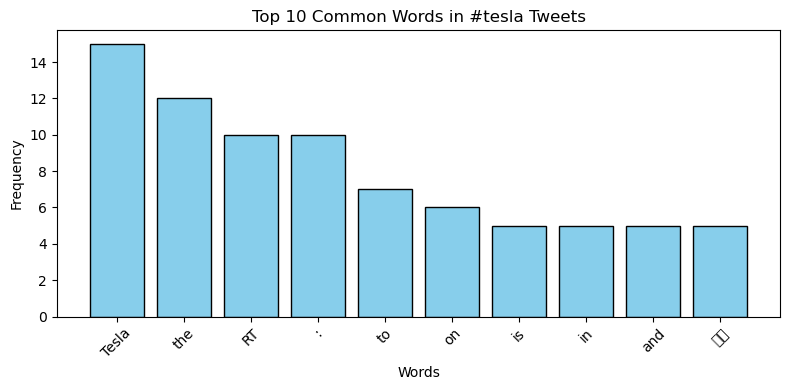

In [28]:
from collections import Counter
import re

# Combine all tweet text
all_text = " ".join(pdf["tweet_text"])

# Simple text cleanup: remove links, RT, hashtags
all_text_cleaned = re.sub(r"http\S+|www\S+|https\S+", '', all_text, flags=re.MULTILINE)
all_text_cleaned = re.sub(r'\@\w+|\#','', all_text_cleaned)

# Split words
words = all_text_cleaned.split()

# Count words
word_counts = Counter(words)

# Get 10 most common words
common_words = word_counts.most_common(10)

# Plot
words, counts = zip(*common_words)

plt.figure(figsize=(8,4))
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.title("Top 10 Common Words in #tesla Tweets")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
